In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [33]:
x = np.array([[2,4],
              [3,5],
              [12,18],
              [15,20],
              [34,56],
              [35,60],
              [78, 26],
              [80, 23]])
y = np.array(["1","1","0","0","1","1","0","0"])

p_df = pd.DataFrame(x, columns=['x1', 'x2'])
p_df['y'] = y

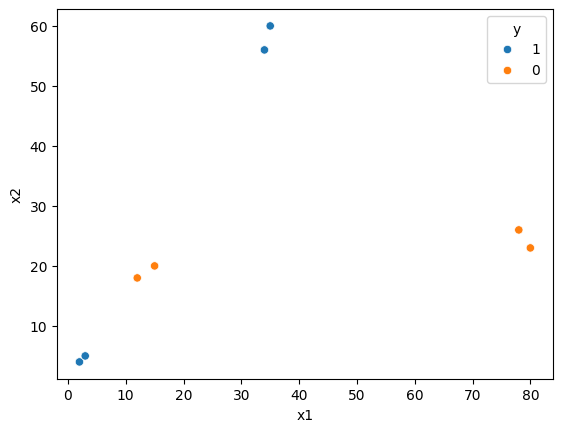

In [34]:
sns.scatterplot(data=p_df, x='x1',y='x2',
                hue='y')
plt.show()

In [44]:
X = p_df[['x1','x2']]
y = p_df['y']

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=24)

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


kfold = StratifiedKFold(shuffle=True, random_state=24, n_splits=2)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

pipe = Pipeline([('DTC', dtc)])

print(pipe.get_params())

params = {'DTC__criterion': ['gini', 'entropy', 'log_loss'], 
          'DTC__min_samples_split': [1,2,3,4,5]}

gcv = GridSearchCV(pipe, param_grid=params, cv=kfold, scoring='neg_log_loss')

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'memory': None, 'steps': [('DTC', DecisionTreeClassifier(random_state=24))], 'verbose': False, 'DTC': DecisionTreeClassifier(random_state=24), 'DTC__ccp_alpha': 0.0, 'DTC__class_weight': None, 'DTC__criterion': 'gini', 'DTC__max_depth': None, 'DTC__max_features': None, 'DTC__max_leaf_nodes': None, 'DTC__min_impurity_decrease': 0.0, 'DTC__min_samples_leaf': 1, 'DTC__min_samples_split': 2, 'DTC__min_weight_fraction_leaf': 0.0, 'DTC__monotonic_cst': None, 'DTC__random_state': 24, 'DTC__splitter': 'best'}
{'DTC__criterion': 'gini', 'DTC__min_samples_split': 2}
-2.220446049250313e-16


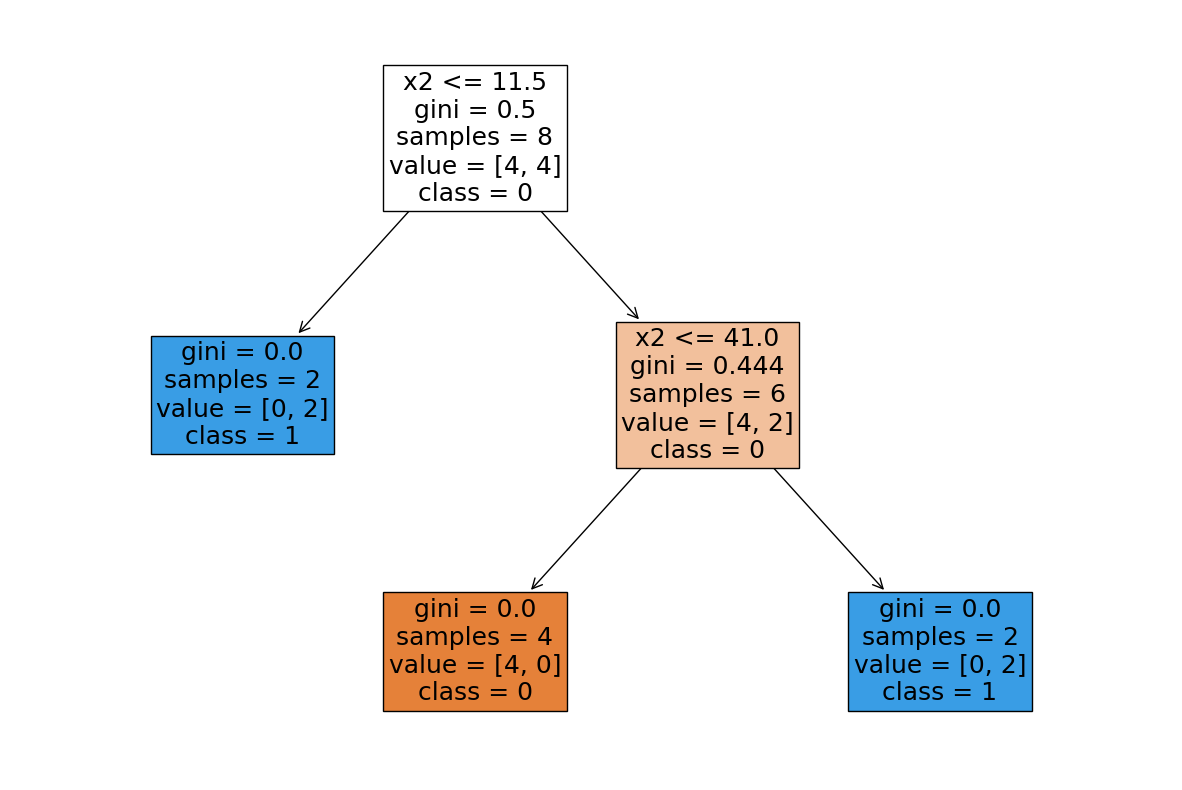

In [47]:
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['0','1'],
               filled=True,fontsize=18)
plt.show() 

## Data 2

In [10]:
x = np.array([[2,4],
              [3,5],
              [12,18],
              [15,20],
              [34,56],
              [35,60],
              [78, 26],
              [80, 23],
              [40, 20],
              [50, 30]])
y = np.array(["1","1","0","0","1",
              "1","0","0","1","1"])

p_df = pd.DataFrame(x, columns=['x1', 'x2'])
p_df['y'] = y

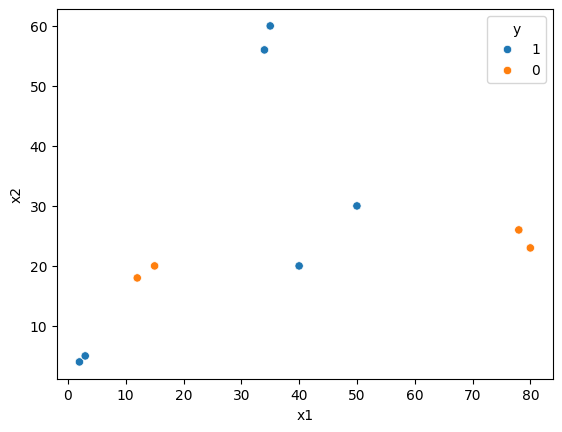

In [11]:
sns.scatterplot(data=p_df, x='x1',y='x2',
                hue='y')
plt.show()

In [12]:
X = p_df[['x1','x2']]
y = p_df['y']

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

DecisionTreeClassifier(random_state=24)

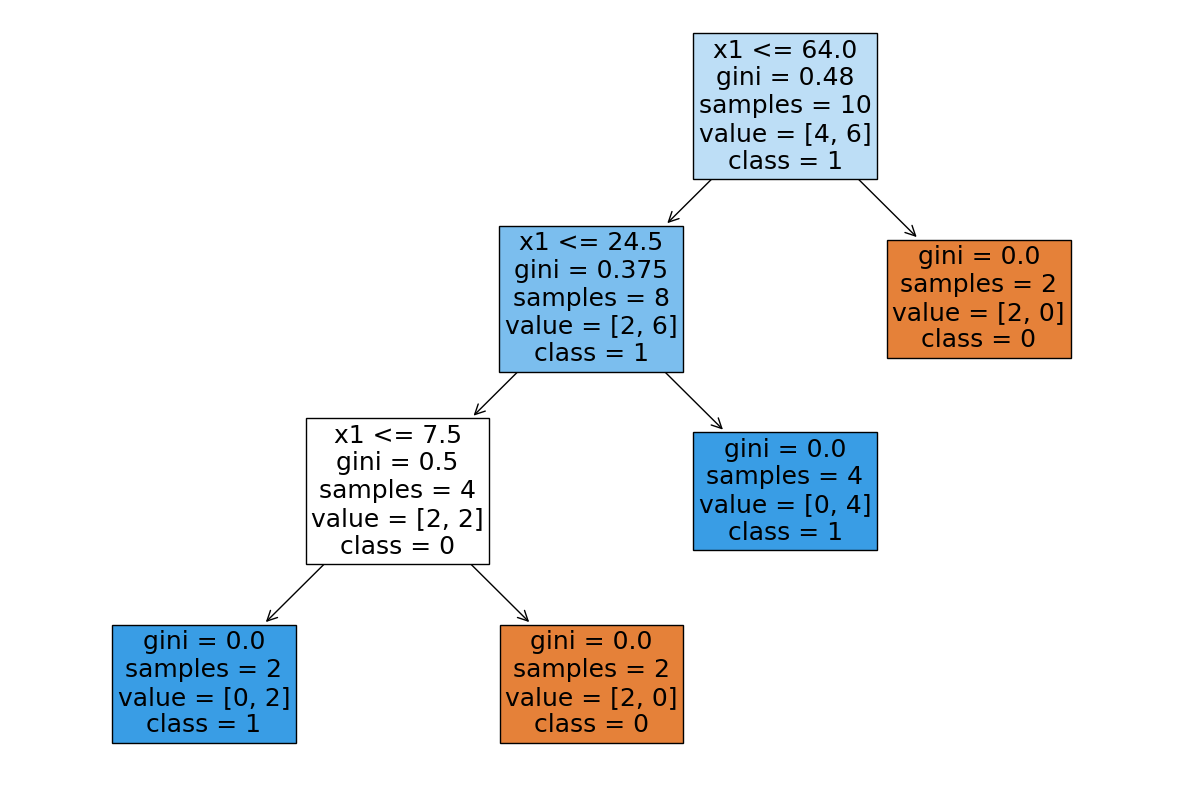

In [13]:
plt.figure(figsize=(15,10))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['0','1'],
               filled=True,fontsize=18)
plt.show()

In [14]:
x = np.array([[2,4],
              [3,5],
              [12,18],
              [15,20],
              [34,56],
              [35,60],
              [78, 26],
              [80, 23],
              [40, 20],
              [50, 30],
              [40, 30],
              [10, 30],
              [80,40],
              [5,40]])
y = np.array(["1","1","0","0","1",
              "1","0","0","1","1",
              "0","1","1","0"])

p_df = pd.DataFrame(x, columns=['x1', 'x2'])
p_df['y'] = y

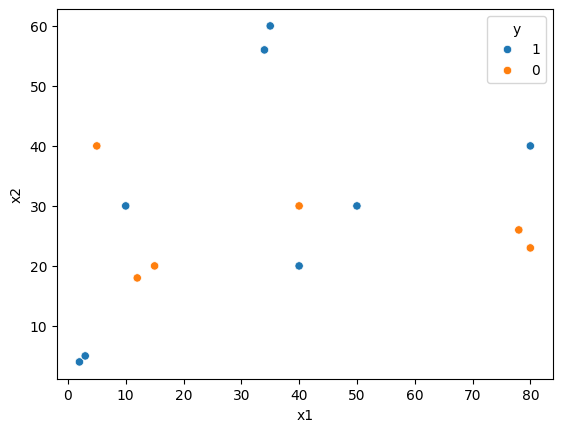

DecisionTreeClassifier(random_state=24)

In [15]:
sns.scatterplot(data=p_df, x='x1',y='x2',
                hue='y')
plt.show()

X = p_df[['x1','x2']]
y = p_df['y']

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)

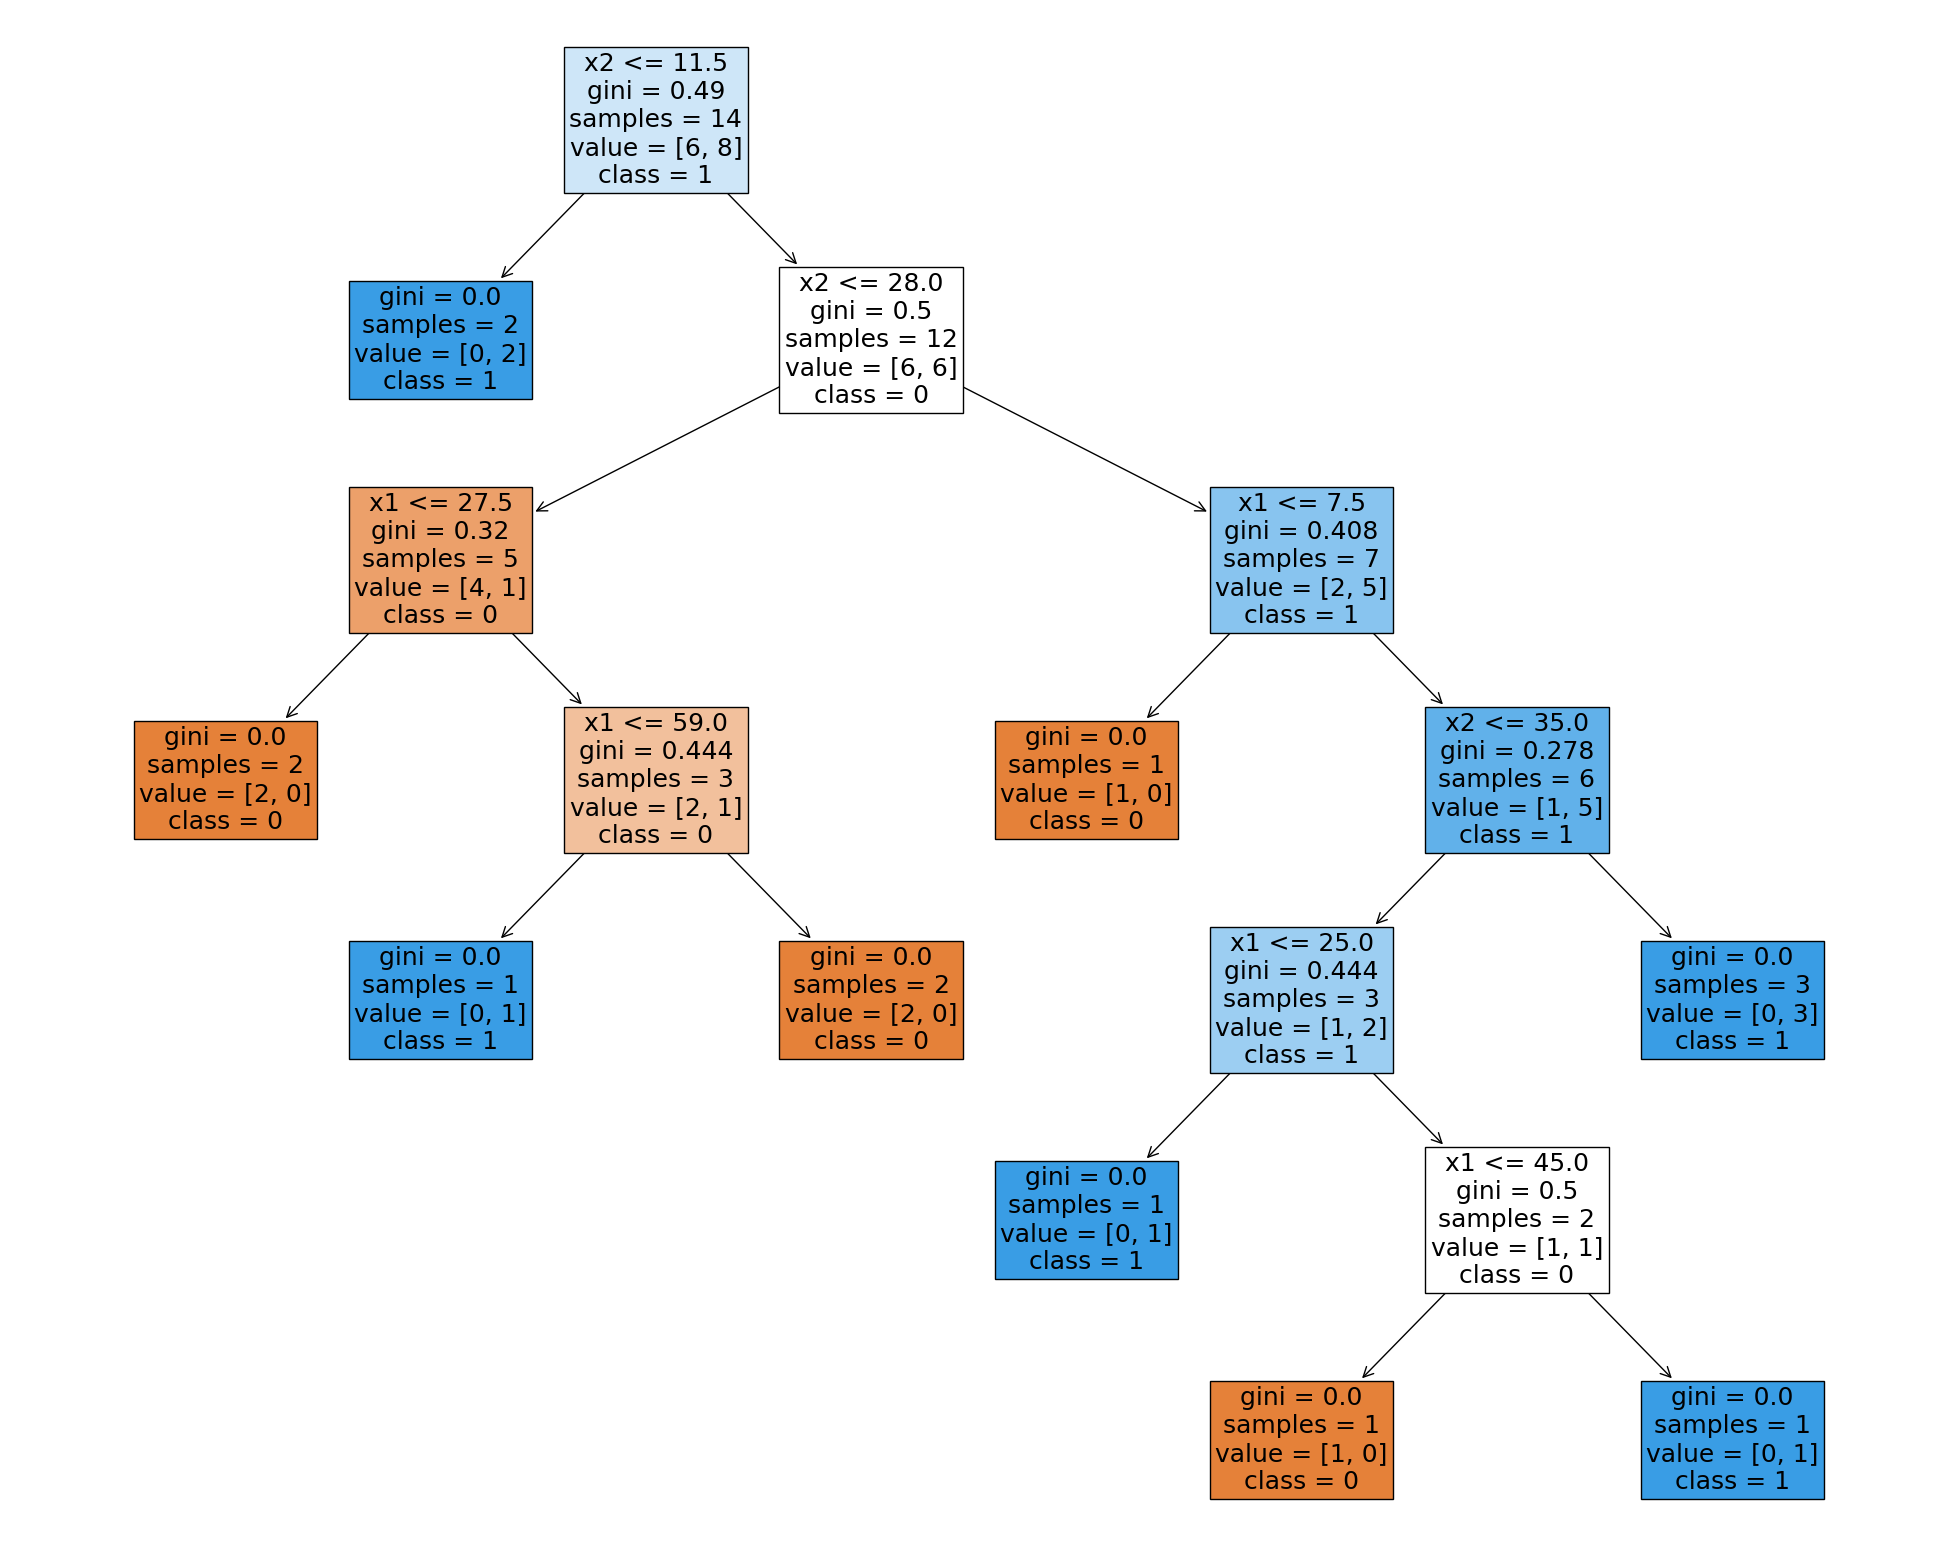

In [16]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['0','1'],
               filled=True,fontsize=18)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   stratify=y,
                                   random_state=24)

dtc = DecisionTreeClassifier(random_state=24, max_depth=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=24)

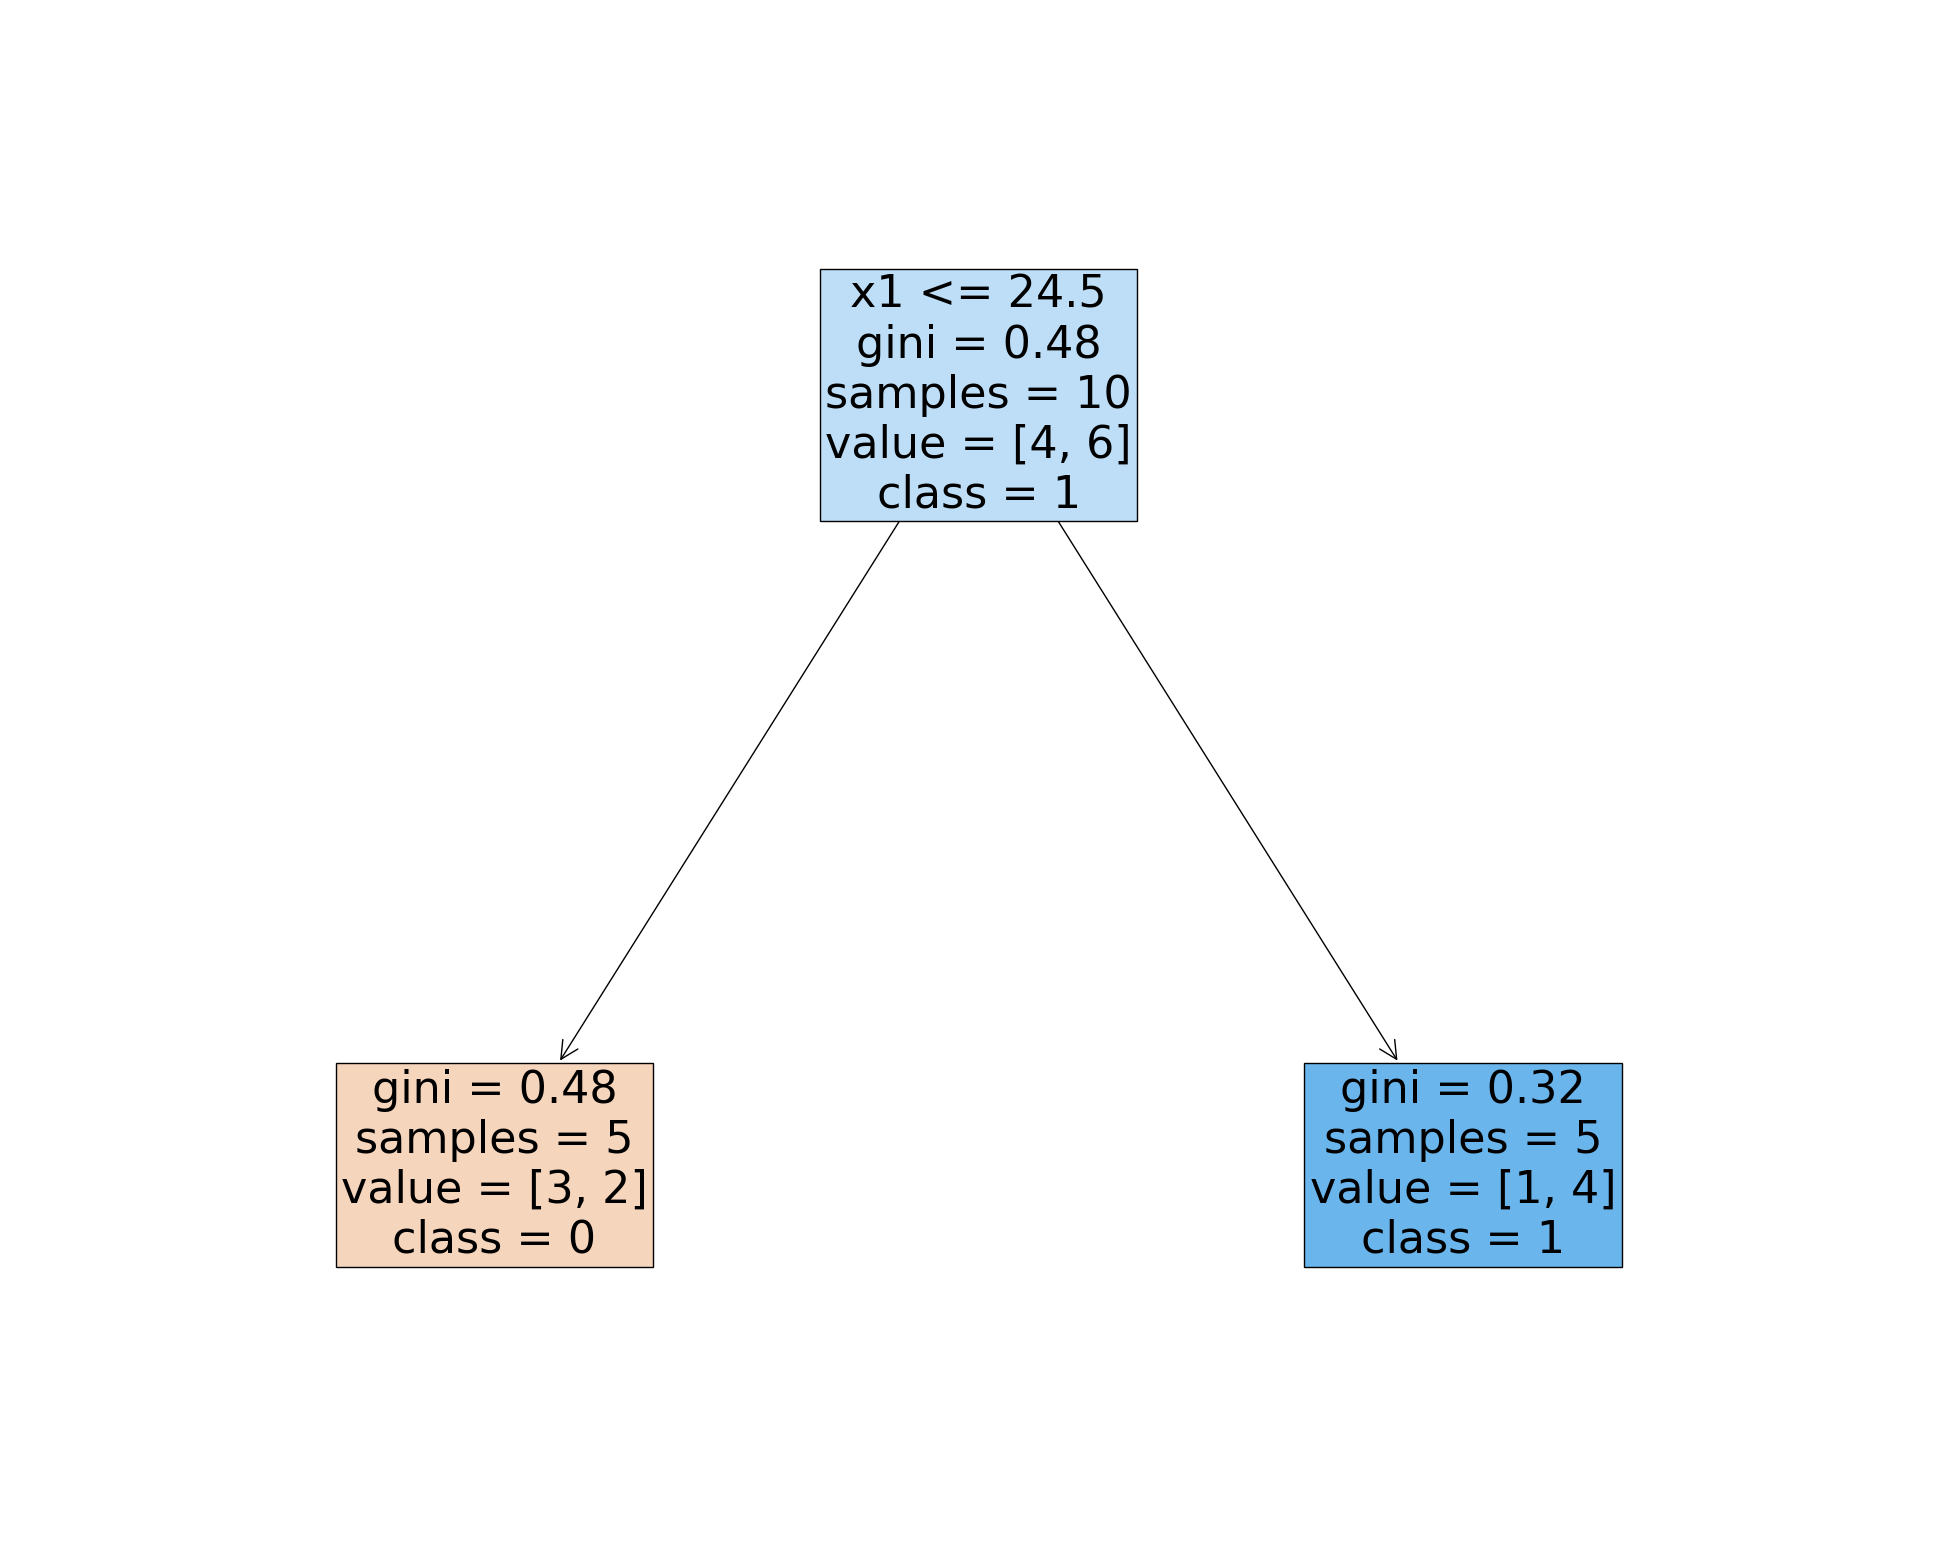

In [18]:
plt.figure(figsize=(25,20))
plot_tree(dtc,feature_names=list(X.columns),
               class_names=['0','1'],
               filled=True,fontsize=32)
plt.show() 

In [19]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.25
